## Creación de datos usando AnDi

Para utilizar este función es importante que tengamos instalado la librería `andi`

In [ ]:
%pip install andi-datasets

In [1]:
import andi
from andi import andi_datasets

La función que utilizaremos nosotros para generar los datos es la función de **create_dataset**. Para utilizar esta, primero debemos crear un objetivo de la clase _andi-datasets_.

In [2]:
help(andi_datasets.create_dataset)

Help on function create_dataset in module andi.andi:

create_dataset(self, T, N, exponents, models, dimension=1, save_trajectories=False, load_trajectories=False, path='datasets/', N_save=1000, t_save=1000)
    Create a dataset of trajectories
    Arguments:
        :T (int):
            - length of the trajectories.   
        :N (int, numpy.array):
            - if int, number of trajectories per class (i.e. exponent and model) in the dataset.
            - if numpy.array, number of trajectories per classes: size (number of models)x(number of classes)    
        :exponents (float, array):
            - anomalous exponents to include in the dataset. Allows for two digit precision.
        :models (bool, int, list):
            - labels of the models to include in the dataset. Correspodance between models and labels
              is given by self.label_correspodance, defined at init.
              If int/list, choose the given models. If False, choose all of them.
        :dimensions 

NOTA!!: En el parámetro _models_ debemos pasarle una lista de los distintos tipos de random-walks que queremos que nos genere datos. Esta lista debe ser un conjunto de numeros enteros que hacen referencia a los siguientes modelos: {0:"attm",1:"ctrw",2:"fbm",3:"lw",4:"sbm"}.

De esta manera, si a la hora de generar datos le pasamos a la variable models la lista [0,1,2], nos generará datos para los modelos de attm, ctrw y fbm.

Por último, debemos tener también en cuenta las siguientes consideraciones:

- Para el modelo de Lévy-Walk (lw), es necesario que el exponente de difusión sea estrictamente mayor que 1.
- Para los modelos de Annealed Transient Time Motion (attm) y Continuous-Time Random Walk (ctrw), es necesario que el exponente de difusión sea menor o igual a 1.

In [3]:
AD = andi_datasets()

Luego simplemente debemos hacer la llamada a la funcion con nuestro objeto `AD` de la clase andi_datasets(). Al contar con los archivos con extensión .h5, esta función tarda relativamente poco ya que no necesita crear los datos desde cero.

In [22]:
data = AD.create_dataset(T=200,N=5,exponents=[1.2,1.4],models=[2,3,4],dimension=3,load_trajectories=True)

In [23]:
import numpy as np
np.round(data,2)

array([[  2.  ,   1.2 ,   0.  , ...,  -1.07,  -1.06,  -1.07],
       [  2.  ,   1.2 ,   0.  , ...,  -0.3 ,  -0.28,  -0.27],
       [  2.  ,   1.2 ,   0.  , ...,   0.22,   0.19,   0.18],
       ...,
       [  4.  ,   1.4 ,   0.  , ..., 106.97, 105.22, 107.22],
       [  4.  ,   1.4 ,   0.  , ..., -29.24, -31.18, -25.79],
       [  4.  ,   1.4 ,   0.  , ..., -63.84, -64.06, -57.62]])

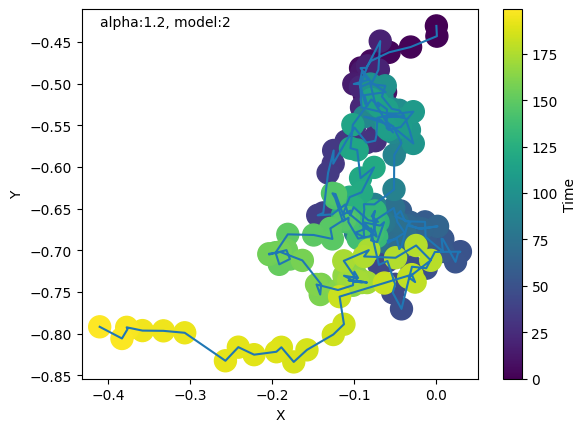

In [27]:
from matplotlib import pyplot as plt
plt.plot(data[0,2:202], data[0, 202:402], '-')
plt.scatter(data[0,2:202], data[0,202:402], c=np.arange(200), s = 250)
plt.colorbar().set_label('Time'); plt.xlabel('X'); plt.ylabel('Y');plt.text(min(data[0,2:202]),max(data[0,202:402]),f"alpha:{data[0,1]}, model:{int(data[0,0])}");